# Exercise 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
genetics = pd.read_csv("matrix_1kg.txt", 
                       sep = "\t")

gen = genetics.iloc[:,4:]
gen

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
alt = gen.sum(axis=1)
alt

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

In [4]:
tot_chr = len(gen.columns)*2

In [5]:
total_alt = alt/tot_chr
total_alt

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

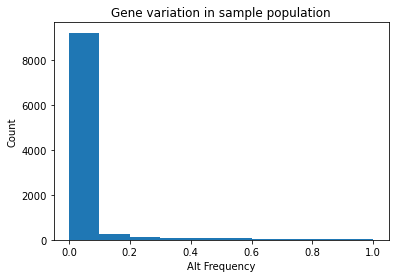

In [6]:
fig, ax = plt.subplots()
ax.hist(total_alt)
ax.set_xlabel( "Alt Frequency" )
ax.set_ylabel( "Count" )
ax.set_title( "Gene variation in sample population" )

plt.show()

# Exercise 3

In [8]:
com_var = (0.95>total_alt) & (total_alt >0.05)

common = genetics.loc[com_var,:]
common


,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,1,2,2,2,2,1,2,2,2,2


In [9]:
gen = common.iloc[:,4:]
gen

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [10]:
gen = gen.T
gen

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [11]:
gen_standard = StandardScaler().fit_transform(gen)
gen_standard.mean(axis = 0)

array([-1.56424673e-16, -6.55327876e-16,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  5.70536118e-16,  1.65749152e-16,
        2.45835098e-16,  2.91847481e-16, -6.09446211e-16, -1.71966924e-15,
        1.30866777e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  1.09048476e-15,  5.13979231e-16,
        1.90010226e-15,  3.07794955e-16,  1.41814870e-15,  2.18210240e-16,
        1.21828241e-16, -2.11726677e-15,  1.54158911e-16, -3.32805473e-16,
       -1.36189682e-15, -3.84264398e-16,  1.92110413e-16,  2.84091606e-16,
       -3.47184343e-16,  2.08206032e-15, -4.99861795e-16, -1.89713934e-15,
       -1.42045803e-16, -8.29878639e-16,  2.96379004e-16,  3.13546503e-16,
       -5.90753680e-16, -2.23621923e-15, -6.62038016e-16, -1.99674570e-15,
       -2.44266494e-16, -1.29531829e-15, -5.92017278e-16,  1.59069513e-15,
       -3.25398177e-16, -9.36957646e-16, -7.13496940e-16,  3.40866355e-16,
        1.77016957e-15,  

In [17]:
pca = PCA(n_components = 2)
pca_output = pca.fit_transform(gen_standard)
pca_output

array([[-6.14493037, -9.81856656],
       [-6.13388414, -8.63182904],
       [-6.23847319, -7.97187008],
       ...,
       [-4.09694721, -2.82736113],
       [-6.26346243, -2.58507933],
       [-3.17677867, -0.91694992]])

In [18]:
pca_output.shape

(2548, 2)

In [19]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2'])
pca_output_df

,PC1,PC2
0,-6.144930,-9.818567
1,-6.133884,-8.631829
2,-6.238473,-7.971870
3,-5.051218,-7.008727
4,-6.634383,-8.543669
...,...,...
2543,-6.304582,-0.169819
2544,-6.295888,-3.116492
2545,-4.096947,-2.827361
2546,-6.263462,-2.585079


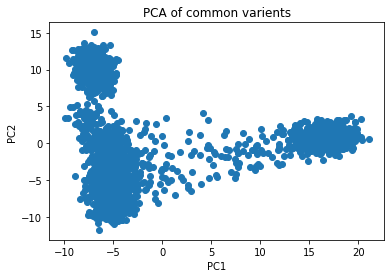

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_xlabel( "PC1" )
ax.set_ylabel( "PC2" )
ax.set_title( "PCA of common varients" )

plt.show()